# Pandas Examples

---
## Example 1 - Product Demand

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a list of products and a list of demands
products = ['Product 1', 'Product 2', 'Product 4', 'Product 6']
demands = [29, 17, 42, 21]

In [5]:
# zip() takes arguments of 2 (or more) lists, of equal lengths.
# It combines the nth element of each list.
# We add list() to the beginning to be able to see the result.
list(zip(products, demands))

[('Product 1', 29), ('Product 2', 17), ('Product 4', 42), ('Product 6', 21)]

In [6]:
# Create a data set from these two lists
productDataset = list(zip(products, demands))
productDataset

[('Product 1', 29), ('Product 2', 17), ('Product 4', 42), ('Product 6', 21)]

In [7]:
# Create a pandas dataframe
df = pd.DataFrame(data=productDataset, columns=['Product Name', 'Demand'])
df

,Product Name,Demand
0,Product 1,29
1,Product 2,17
2,Product 4,42
3,Product 6,21


#### 1) Print just the column of product names:

In [9]:
df[['Product Name']]

,Product Name
0,Product 1
1,Product 2
2,Product 4
3,Product 6


#### 2) Print the demand column first, and the product name column second:

In [10]:
df[['Demand', 'Product Name']]

,Demand,Product Name
0,29,Product 1
1,17,Product 2
2,42,Product 4
3,21,Product 6


#### 3) Print only the first 2 rows of data:

In [11]:
df[:2]

,Product Name,Demand
0,Product 1,29
1,Product 2,17


#### 4) Print only the first 2 rows, and only the demand column:
- I'm showing several ways to accomplish the same result below.

In [12]:
# Here's one way to do it, wrapping the 'Demand' column 
# inside a nested list:
df[:2][['Demand']]

# NOTE:  If you want to display more than 1 column, you MUST
#        use the nested list syntax.

,Demand
0,29
1,17


In [13]:
# Here's another way.
# Since we only want to display 1 column, we don't need
# to wrap 'Demand' inside a nested list:
df[:2]['Demand']

0    29
1    17
Name: Demand, dtype: int64

In [14]:
# Pandas is smart enough to differentiate between rows and 
# columns, since our rows are using default (integer) indices:
df['Demand'][:2]

0    29
1    17
Name: Demand, dtype: int64

In [15]:
# Similarly, we can apply the nested list for 'Demand':
df[['Demand']][:2]

,Demand
0,29
1,17


#### 5) Print only the last 2 rows of data.  Print the demand column before the product name column.
- I'm showing two different ways to do this below.
- Of course there are other ways to do it as well.

In [20]:
# Print only the last 2 rows of data:
df.iloc[-2:][['Demand', 'Product Name']]

,Demand,Product Name
2,42,Product 4
3,21,Product 6


In [21]:
df[['Demand', 'Product Name']][-2:]

,Demand,Product Name
2,42,Product 4
3,21,Product 6


#### 6) Sort the products according to decreasing demand:

In [23]:
df.sort_values(['Demand'], ascending=False)

,Product Name,Demand
2,Product 4,42
0,Product 1,29
3,Product 6,21
1,Product 2,17


In [24]:
# 

df.sort_values(['Demand', 'Product Name'], ascending=False)

,Product Name,Demand
2,Product 4,42
0,Product 1,29
3,Product 6,21
1,Product 2,17


#### 7)  Find the product with the maximum demand
- **NOTE**:  We want to save both the product name and the corresponding maximum demand to variables (so we can make use of this info later).  
- Do not use "for" loops.

In [25]:
# Approach #1:

# We'll start by creating a new dataframe that has the demand
# values sorted in DESCENDING order.
# Using .head(1) will give us the first row (which corresponds
# to the maximum demand):
df1 = df.sort_values(['Demand'], ascending=False).head(1)
df1

# NOTE: If we had two products that had the maximum demand,
#       this approach would only get one of them.

,Product Name,Demand
2,Product 4,42


In [26]:
# Next, we'll extract the product name and demand values:
myProd   = df1['Product Name'].values[0]
myDemand = df1['Demand'].values[0]
myProd, myDemand

('Product 4', 42)

In [27]:
myProd

'Product 4'

The 5 cells below show what happens if you don't use `.values[0]`.

In [28]:
# NOTE:  If we hadn't used .values[0] above, we'd get lists.
# For example:
myProdList   = df1['Product Name'].values
myDemandList = df1['Demand'].values

In [29]:
# Instead of getting a scalar product name, we get a pandas object:
myProdList

array(['Product 4'], dtype=object)

In [30]:
# We can access the product name like we would with a list:
myProdList[0]

'Product 4'

In [31]:
# Displaying "myProdList" explicitly as a list:
list(myProdList)

['Product 4']

In [32]:
# We could then get a scalar like this:
list(myProdList)[0]

'Product 4'

In [33]:
# Approach #2:

# We'll first find the maximum demand:
maxDemand  = df['Demand'].max()

# Then, we'll filter for ALL products that share the max demand.
# Using .values gives us a list (not a scalar)
maxProductList = df['Product Name'][df['Demand'] == df['Demand'].max()].values

# NOTE:  This is better than Approach #1, since we can find
#        multiple products.

In [34]:
# maxDemand is a scalar:
maxDemand

42

In [35]:
# maxProductList is a list (in this case it only has 1 element):
maxProductList

array(['Product 4'], dtype=object)

In [36]:
# It looks better when formatted as a list:
list(maxProductList)

['Product 4']

In [37]:
# Approach #3:

# Here, we'll get an array of lists 
# containing both the product name and the max demand:
result = df[['Product Name', 'Demand']][df['Demand'] == df['Demand'].max()].values
result

array([['Product 4', 42]], dtype=object)

In [39]:
result[0][0]

'Product 4'

In [40]:
# Since we only have 1 matching product, we can filter for the 
# first (only) outer list, and then look for the first element 
# in that list:
productList = result[0][0]
productList

'Product 4'

In [41]:
# Similarly, the demand is found in the second position of the 
# first (only) outer list:
maxDemand = result[0][1]
maxDemand

42

In [42]:
# NOTE:  The nice thing about Approach 3 is that it can handle 
#        multiple products. 
#        For example, suppose we look for all products LESS than
#        the maximum demand:
result2 = df[['Product Name', 'Demand']][df['Demand'] < df['Demand'].max()].values
result2

array([['Product 1', 29],
       ['Product 2', 17],
       ['Product 6', 21]], dtype=object)

In [43]:
print(result2[0][0])
print(result2[1][0])
print(result2[2][0])

Product 1
Product 2
Product 6


#### 8)  Add a new column of data, named 'Sales Price'
- Assign the values as numpy NaN for now

In [44]:
df['Sales Price'] = np.nan
df

,Product Name,Demand,Sales Price
0,Product 1,29,NaN
1,Product 2,17,NaN
2,Product 4,42,NaN
3,Product 6,21,NaN


#### 9) Assign the following prices to your new column

In [45]:
prices = [1.99, 2.50, 0.99, 3.75]

In [46]:
df['Sales Price'] = prices
df

,Product Name,Demand,Sales Price
0,Product 1,29,1.99
1,Product 2,17,2.50
2,Product 4,42,0.99
3,Product 6,21,3.75


#### 10)  Add another column named 'Cost', with the following values

In [47]:
costs = [1.0, 2.0, 0.5, 2.25]

In [48]:
df['Cost'] = costs
df

,Product Name,Demand,Sales Price,Cost
0,Product 1,29,1.99,1.00
1,Product 2,17,2.50,2.00
2,Product 4,42,0.99,0.50
3,Product 6,21,3.75,2.25


#### 11) Add yet another column named 'Profit'
- Profit = (sales price) - (cost)

In [49]:
df['Profit'] = df['Sales Price'] - df['Cost']
df

,Product Name,Demand,Sales Price,Cost,Profit
0,Product 1,29,1.99,1.00,0.99
1,Product 2,17,2.50,2.00,0.50
2,Product 4,42,0.99,0.50,0.49
3,Product 6,21,3.75,2.25,1.50


#### 12)  Add a row of data
**Product 9 has a demand of 99, a sales price of 9.99, a cost of 8.88, and a profit of 1.11**

In [50]:
df.loc[len(df)] = ['Product 9', 99, 9.99, 8.88, 1.11]
df

,Product Name,Demand,Sales Price,Cost,Profit
0,Product 1,29,1.99,1.00,0.99
1,Product 2,17,2.50,2.00,0.50
2,Product 4,42,0.99,0.50,0.49
3,Product 6,21,3.75,2.25,1.50
4,Product 9,99,9.99,8.88,1.11


#### 13) Delete the Sales Price column

In [51]:
del df['Sales Price']
df

,Product Name,Demand,Cost,Profit
0,Product 1,29,1.00,0.99
1,Product 2,17,2.00,0.50
2,Product 4,42,0.50,0.49
3,Product 6,21,2.25,1.50
4,Product 9,99,8.88,1.11


#### 14) Make Product Name an index

In [52]:
df.index = df['Product Name']
df

,Product Name,Demand,Cost,Profit
Product Name,,,,
Product 1,Product 1,29,1.00,0.99
Product 2,Product 2,17,2.00,0.50
Product 4,Product 4,42,0.50,0.49
Product 6,Product 6,21,2.25,1.50
Product 9,Product 9,99,8.88,1.11


#### 15)  Filter just for Product 4

In [53]:
df.loc['Product 4']

Product Name    Product 4
Demand                 42
Cost                  0.5
Profit               0.49
Name: Product 4, dtype: object

#### 16) Filter for products 1 through 4

In [54]:
df.loc['Product 1':'Product 4']

,Product Name,Demand,Cost,Profit
Product Name,,,,
Product 1,Product 1,29,1.0,0.99
Product 2,Product 2,17,2.0,0.50
Product 4,Product 4,42,0.5,0.49


---

## Example 2 -- Daily Show Guests

In [55]:
# Import the Daily Show guest list
csvFile = 'daily_show_guests.csv'
df = pd.read_csv(csvFile)
df

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier
5,1999,actor,1/19/99,Acting,William Baldwin
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe
7,1999,model,1/21/99,Media,Carmen Electra
8,1999,actor,1/25/99,Acting,Matthew Lillard
9,1999,stand-up comedian,1/26/99,Comedy,David Cross


In [56]:
# Mac users - display the contents of a text file:
!cat daily_show_guests.csv

YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
1999,actor,1/11/99,Acting,Michael J. Fox
1999,Comedian,1/12/99,Comedy,Sandra Bernhard
1999,television actress,1/13/99,Acting,Tracey Ullman
1999,film actress,1/14/99,Acting,Gillian Anderson
1999,actor,1/18/99,Acting,David Alan Grier
1999,actor,1/19/99,Acting,William Baldwin
1999,Singer-lyricist,1/20/99,Musician,Michael Stipe
1999,model,1/21/99,Media,Carmen Electra
1999,actor,1/25/99,Acting,Matthew Lillard
1999,stand-up comedian,1/26/99,Comedy,David Cross
1999,actress,1/27/99,Acting,Yasmine Bleeth
1999,actor,1/28/99,Acting,D. L. Hughley
1999,television actress,10/18/99,Acting,Rebecca Gayheart
1999,Comedian,10/19/99,Comedy,Steven Wright
1999,actress,10/20/99,Acting,Amy Brenneman
1999,actress,10/21/99,Acting,Melissa Gilbert
1999,actress,10/25/99,Acting,Cathy Moriarty
1999,comedian,10/26/99,Comedy,Louie Anderson
1999,actress,10/27/99,Acting,Sarah Michelle Gellar
1999,Singer-songwriter,10/28/99,Musician,Melanie C
1999,actor,10/4/99,Act

2010,former us representative,8/17/10,Politician,Dick Armey
2010,author,8/18/10,Media,Edward P. Kohn
2010,actress,8/19/10,Acting,Jennifer Aniston
2010,Author,8/2/10,Media,Mary Roach
2010,Former Governor of Illinois,8/23/10,Politician,Rod Blagojevich
2010,journalist,8/24/10,Media,Brian Williams
2010,actress,8/25/10,Acting,Drew Barrymore
2010,Former Mayor of New York City,8/26/10,Politician,Michael Bloomberg
2010,actor,8/3/10,Acting,Will Ferrell (The interview also featured Rob Riggle
2010,journalist,8/4/10,Media,Bruce B. Henderson
2010,university professor,8/5/10,Academic,Akbar Ahmed
2010,actor,9/13/10,Acting,Ben Affleck
2010,Former British Prime Minister,9/14/10,Politician,Tony Blair
2010,actor,9/15/10,Acting,Jon Hamm
2010,president,9/16/10,Politician,President Bill Clinton
2010,presidnet,9/20/10,Politician,President Jimmy Carter
2010,actress,9/21/10,Acting,Sigourney Weaver
2010,actor,9/22/10,Acting,Edward Norton
2010,king,9/23/10,Politician,H.M. Abdullah II
2010,television host,9/27/1

In [57]:
df.dtypes

YEAR                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Raw_Guest_List               object
dtype: object

In [58]:
# Convert the 'Show' date (d/m/YY) to a pandas datestamp
df['date'] = pd.to_datetime(df['Show'], infer_datetime_format=True)
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date
0,1999,actor,1/11/99,Acting,Michael J. Fox,1999-01-11
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1999-01-12
2,1999,television actress,1/13/99,Acting,Tracey Ullman,1999-01-13
3,1999,film actress,1/14/99,Acting,Gillian Anderson,1999-01-14
4,1999,actor,1/18/99,Acting,David Alan Grier,1999-01-18


In [59]:
df.dtypes

YEAR                                  int64
GoogleKnowlege_Occupation            object
Show                                 object
Group                                object
Raw_Guest_List                       object
date                         datetime64[ns]
dtype: object

In [60]:
# Check out the documentation:
pd.to_datetime?

In [61]:
# We're going to add some new columns to make it easier 
# for us to filter the data later (based on date elements):
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day

# .weekday gives us integer values (0 is Monday, 6 is Sunday):
df['Weekday'] = pd.DatetimeIndex(df['date']).weekday

# .weekday_name gives us text strings:
df['WeekdayName'] = pd.DatetimeIndex(df['date']).weekday_name

df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
0,1999,actor,1/11/99,Acting,Michael J. Fox,1999-01-11,1999,1,11,0,Monday
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1999-01-12,1999,1,12,1,Tuesday
2,1999,television actress,1/13/99,Acting,Tracey Ullman,1999-01-13,1999,1,13,2,Wednesday
3,1999,film actress,1/14/99,Acting,Gillian Anderson,1999-01-14,1999,1,14,3,Thursday
4,1999,actor,1/18/99,Acting,David Alan Grier,1999-01-18,1999,1,18,0,Monday


In [64]:
# Make the date an index:
df.index = df['date']

df.index.weekday

Int64Index([0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
            ...
            1, 2, 3, 0, 1, 2, 3, 0, 1, 2],
           dtype='int64', name='date', length=2693)

In [65]:
# Get some general information about our dataframe:
df['Group'].describe()

count       2662
unique        17
top       Acting
freq         930
Name: Group, dtype: object

In [66]:
# How many records do we have?
len(df)

2693

In [81]:
# Find rows where 'Group' is null
df[df['Group'].isnull()]

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
date,,,,,,,,,,,
1999-12-15,1999,NaN,12/15/99,NaN,Greatest Millennium Special,1999-12-15,1999,12,15,2,Wednesday
1999-07-21,1999,NaN,7/21/99,NaN,Third Anniversary Special,1999-07-21,1999,7,21,2,Wednesday
1999-08-30,1999,NaN,8/30/99,NaN,The Daily Show Summer Spectacular,1999-08-30,1999,8,30,0,Monday
2000-11-20,2000,NaN,11/20/00,NaN,Tales of Survival with Vance DeGeneres,2000-11-20,2000,11,20,0,Monday
2000-12-13,2000,NaN,12/13/00,NaN,no guest,2000-12-13,2000,12,13,2,Wednesday
2000-07-19,2000,NaN,7/19/00,NaN,Fourth Anniversary Special,2000-07-19,2000,7,19,2,Wednesday
2000-07-31,2000,NaN,7/31/00,NaN,Campaign Trail to the Road to the White House ...,2000-07-31,2000,7,31,0,Monday
2001-05-02,2001,NaN,5/2/01,NaN,No guest,2001-05-02,2001,5,2,2,Wednesday
2002-10-14,2002,NaN,10/14/02,NaN,Road to Washington Special,2002-10-14,2002,10,14,0,Monday


- **NOTE**:  
    - The `df['Group'].describe()` function says there are 2662 rows with a defined (i.e., non-null) 'Group' value.
    - However, `len(df)` tells us there are 2693 rows.  This means we have some records without a 'Group' defined.

In [82]:
# Create groups:
group = df.groupby('Group').size()
group

Group
Academic          103
Acting            930
Advocacy           24
Athletics          52
Business           25
Clergy              8
Comedy            150
Consultant         18
Government         40
Media             751
Military           16
Misc               45
Musician          123
Political Aide     36
Politician        308
Science            28
media               5
dtype: int64

In [83]:
# How many groups do we have?
len(group)

17

**NOTE:** We have a 'Media' group and a 'media' group. 
- These are probably the same...someone just forgot to capitalize 'media'.  Let's clean up our data.

In [84]:
# First, let's display the records where 'Group' equals 'media':
df.loc[df['Group'] == 'media','Group']

date
2001-03-21    media
2002-10-15    media
2002-11-06    media
2002-04-09    media
2011-03-24    media
Name: Group, dtype: object

In [85]:
# We could also DISPLAY the results like this:
df['Group'][df['Group'] == 'media']

date
2001-03-21    media
2002-10-15    media
2002-11-06    media
2002-04-09    media
2011-03-24    media
Name: Group, dtype: object

In [86]:
# Now, let's actually correct the error:
df.loc[df['Group'] == 'media','Group'] = 'Media'
df

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
date,,,,,,,,,,,
1999-01-11,1999,actor,1/11/99,Acting,Michael J. Fox,1999-01-11,1999,1,11,0,Monday
1999-01-12,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1999-01-12,1999,1,12,1,Tuesday
1999-01-13,1999,television actress,1/13/99,Acting,Tracey Ullman,1999-01-13,1999,1,13,2,Wednesday
1999-01-14,1999,film actress,1/14/99,Acting,Gillian Anderson,1999-01-14,1999,1,14,3,Thursday
1999-01-18,1999,actor,1/18/99,Acting,David Alan Grier,1999-01-18,1999,1,18,0,Monday
1999-01-19,1999,actor,1/19/99,Acting,William Baldwin,1999-01-19,1999,1,19,1,Tuesday
1999-01-20,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,1999-01-20,1999,1,20,2,Wednesday
1999-01-21,1999,model,1/21/99,Media,Carmen Electra,1999-01-21,1999,1,21,3,Thursday
1999-01-25,1999,actor,1/25/99,Acting,Matthew Lillard,1999-01-25,1999,1,25,0,Monday


In [ ]:
# NOTE:  Pandas complains about this syntax:
# df['Group'][df['Group'] == 'media'] = 'Media'
# df

In [87]:
# Let's make sure we corrected the issue.
# This shouldn't return any results
df.loc[df['Group'] == 'media']

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
date,,,,,,,,,,,


In [88]:
# Let's do some more checking:
df.loc[df['Group'] == 'Media']

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
date,,,,,,,,,,,
1999-01-21,1999,model,1/21/99,Media,Carmen Electra,1999-01-21,1999,1,21,3,Thursday
1999-10-05,1999,television personality,10/5/99,Media,Maury Povich,1999-10-05,1999,10,5,1,Tuesday
1999-11-04,1999,Model,11/4/99,Media,Roshumba Williams,1999-11-04,1999,11,4,3,Thursday
1999-12-13,1999,journalist,12/13/99,Media,Joan Lunden,1999-12-13,1999,12,13,0,Monday
1999-03-17,1999,writer,3/17/99,Media,"Frank DeCaro's Oscar Special, John Larroquette",1999-03-17,1999,3,17,2,Wednesday
1999-03-29,1999,Film director,3/29/99,Media,Ron Howard,1999-03-29,1999,3,29,0,Monday
1999-06-22,1999,television host,6/22/99,Media,Jimmy Kimmel,1999-06-22,1999,6,22,1,Tuesday
1999-07-13,1999,muppet,7/13/99,Media,Miss Piggy,1999-07-13,1999,7,13,1,Tuesday
1999-08-12,1999,director,8/12/99,Media,Eduardo Sanchez and Daniel Myrick,1999-08-12,1999,8,12,3,Thursday


In [89]:
# Alternatively:
df[df['Group'] == 'Media']

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
date,,,,,,,,,,,
1999-01-21,1999,model,1/21/99,Media,Carmen Electra,1999-01-21,1999,1,21,3,Thursday
1999-10-05,1999,television personality,10/5/99,Media,Maury Povich,1999-10-05,1999,10,5,1,Tuesday
1999-11-04,1999,Model,11/4/99,Media,Roshumba Williams,1999-11-04,1999,11,4,3,Thursday
1999-12-13,1999,journalist,12/13/99,Media,Joan Lunden,1999-12-13,1999,12,13,0,Monday
1999-03-17,1999,writer,3/17/99,Media,"Frank DeCaro's Oscar Special, John Larroquette",1999-03-17,1999,3,17,2,Wednesday
1999-03-29,1999,Film director,3/29/99,Media,Ron Howard,1999-03-29,1999,3,29,0,Monday
1999-06-22,1999,television host,6/22/99,Media,Jimmy Kimmel,1999-06-22,1999,6,22,1,Tuesday
1999-07-13,1999,muppet,7/13/99,Media,Miss Piggy,1999-07-13,1999,7,13,1,Tuesday
1999-08-12,1999,director,8/12/99,Media,Eduardo Sanchez and Daniel Myrick,1999-08-12,1999,8,12,3,Thursday


In [90]:
# Let's compare the difference between .size() and .count():
df.groupby('Group').size()

# .size() gives us a data series with the number of records 
# for each 'Group' value.

Group
Academic          103
Acting            930
Advocacy           24
Athletics          52
Business           25
Clergy              8
Comedy            150
Consultant         18
Government         40
Media             756
Military           16
Misc               45
Musician          123
Political Aide     36
Politician        308
Science            28
dtype: int64

In [91]:
df.groupby('Group').count()

# .count() returns all of the columns of the dataframe, with 
# a count of the number of occurrances for each group.

,YEAR,GoogleKnowlege_Occupation,Show,Raw_Guest_List,date,Year,Month,Day,Weekday,WeekdayName
Group,,,,,,,,,,
Academic,103,103,103,103,103,103,103,103,103,103
Acting,930,930,930,930,930,930,930,930,930,930
Advocacy,24,24,24,24,24,24,24,24,24,24
Athletics,52,52,52,52,52,52,52,52,52,52
Business,25,25,25,25,25,25,25,25,25,25
Clergy,8,8,8,8,8,8,8,8,8,8
Comedy,150,150,150,150,150,150,150,150,150,150
Consultant,18,18,18,18,18,18,18,18,18,18
Government,40,40,40,40,40,40,40,40,40,40


In [92]:
# Create a new DataFrame with just group count info:
counts_df = pd.DataFrame(df.groupby('Group').size().rename('counts'))
counts_df

,counts
Group,
Academic,103
Acting,930
Advocacy,24
Athletics,52
Business,25
Clergy,8
Comedy,150
Consultant,18
Government,40


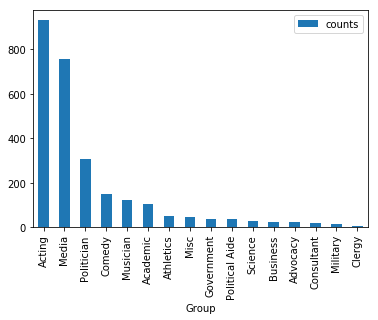

In [94]:
# Create a plot of these counts
import matplotlib.pyplot as plt

Sorted = counts_df.sort_values(['counts'], ascending=False)
Sorted.plot(kind='bar')
plt.show();

In [95]:
# Find records with missing group names
df[['Group']][pd.isnull(df['Group']) == True]

,Group
date,
1999-12-15,NaN
1999-07-21,NaN
1999-08-30,NaN
2000-11-20,NaN
2000-12-13,NaN
2000-07-19,NaN
2000-07-31,NaN
2001-05-02,NaN
2002-10-14,NaN


In [96]:
# Let's find the total number of guests:
df['Raw_Guest_List'].describe()

count               2693
unique              1669
top       Fareed Zakaria
freq                  19
Name: Raw_Guest_List, dtype: object

In [97]:
# Filter for musicians.  Show the musician names:
df[['Raw_Guest_List', 'Group']][df['Group'] == 'Musician']

,Raw_Guest_List,Group
date,,
1999-01-20,Michael Stipe,Musician
1999-10-28,Melanie C,Musician
1999-11-16,Tori Amos,Musician
1999-11-29,Goo Goo Dolls,Musician
1999-11-03,Dave Grohl,Musician
1999-12-21,Jewel,Musician
1999-03-01,John Tesh,Musician
1999-03-10,Sammy Hagar,Musician
1999-03-11,"Hootie & the Blowfish, Billy Crystal",Musician


In [98]:
# Find information about Musicians:
df[['Raw_Guest_List']][df['Group'] == 'Musician'].describe()

,Raw_Guest_List
count,123
unique,101
top,Randy Jackson
freq,3


In [99]:
# List the unique musicians:
uniqueMusicians = df['Raw_Guest_List'][df['Group'] == 'Musician'].unique()
uniqueMusicians

array(['Michael Stipe', 'Melanie C', 'Tori Amos', 'Goo Goo Dolls',
       'Dave Grohl', 'Jewel', 'John Tesh', 'Sammy Hagar',
       'Hootie & the Blowfish, Billy Crystal', 'Chris Isaak',
       'Chris Robinson', 'Harry Connick Jr.', 'Donny Osmond',
       'Vince Neil', 'LL Cool J', 'Dwight Yoakam',
       'Donny Osmond Marie Osmond', 'Ice Cube', 'Robbie Williams',
       'Alice Cooper', 'Posh Spice & Baby Spice', 'Moby', 'John Lydon',
       'Roger Daltrey', 'Richie Sambora', 'Slash', 'Barenaked Ladies',
       'Spinal Tap', 'Vitamin C', 'Lance Bass', 'Gene Simmons', 'Mí_a',
       'Spice Girls', 'They Might Be Giants', 'Dave Navarro',
       'Tenacious D', 'Ja Rule', 'Christina Aguilera', 'Jakob Dylan',
       'Barry Manilow', 'The Goo Goo Dolls', 'Elvis Costello',
       'Alanis Morissette', 'Busta Rhymes', 'Wyclef Jean', 'Ringo Starr',
       'Randy Jackson', 'Ludacris', 'Kelly Clarkson', 'Tyrese Gibson',
       'John Popper', 'Norah Jones', 'Wynton Marsalis',
       'Melissa Etheri

In [100]:
# We can explicitly find the number of unique musicians:
len(uniqueMusicians)

101

In [101]:
# Find the guests that appeared in 2010
# Option 1 (use the year column):
df[['Raw_Guest_List']][df['Year'] == 2010]

,Raw_Guest_List
date,
2010-01-11,John Yoo
2010-01-12,Paul Ingrassia
2010-01-13,Ringo Starr and The Ben Harper Band
2010-01-13,Ringo Starr and The Ben Harper Band
2010-01-14,Tom Brokaw
2010-01-18,David M. Walker
2010-01-19,Colin Firth
2010-01-20,Jim Wallis
2010-01-21,Julie Andrews


In [102]:
# Option 2 (use the date index):
print(df[['Raw_Guest_List', 'Group']].loc['2010-1-1':'2010-12-31'])

                                               Raw_Guest_List           Group
date                                                                         
2010-01-11                                           John Yoo            Misc
2010-01-12                                     Paul Ingrassia           Media
2010-01-13                Ringo Starr and The Ben Harper Band        Musician
2010-01-13                Ringo Starr and The Ben Harper Band        Musician
2010-01-14                                         Tom Brokaw           Media
2010-01-18                                    David M. Walker      Government
2010-01-19                                        Colin Firth          Acting
2010-01-20                                         Jim Wallis           Media
2010-01-21                                      Julie Andrews          Acting
2010-01-25                                         Bill Gates        Business
2010-01-26                                   Elizabeth Warren   

In [103]:
# Find the guests that appeared in 2010 and were actors
df[['Raw_Guest_List', 'Group']][df['Group'] == 'Acting'].loc['2010-1-1':'2010-12-31']

,Raw_Guest_List,Group
date,,
2010-01-19,Colin Firth,Acting
2010-01-21,Julie Andrews,Acting
2010-01-07,Maggie Gyllenhaal,Acting
2010-10-11,Johnny Knoxville,Acting
2010-10-05,Bruce Willis,Acting
2010-10-07,Naomi Watts,Acting
2010-11-11,Rosario Dawson,Acting
2010-11-29,Judah Friedlander,Acting
2010-11-09,Harrison Ford,Acting


In [104]:
df[['Raw_Guest_List', 'Group']][df['Group'] == 'Acting'].loc['2010-1-1':'2010-12-31'].describe()

,Raw_Guest_List,Group
count,45,45
unique,44,1
top,Tracy Morgan,Acting
freq,2,45


In [105]:
# Find the guests that appeared in November and were politicians
df[['Raw_Guest_List']][(df['Month'] == 11) & (df['Group'] == 'Politician')].describe()

,Raw_Guest_List
count,25
unique,25
top,Reince Priebus
freq,1


In [106]:
# Count the number of shows by weekday
weekday_counts = df.groupby('Weekday').size()
weekday_counts

Weekday
0    623
1    689
2    693
3    678
4      9
6      1
dtype: int64

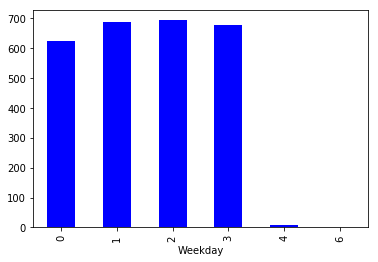

In [107]:
# Plot the number of shows by day of the week:
weekday_counts.plot.bar(color='blue');

# This figure will be confusing if people don't know that 
# "0" is "Monday".

In [108]:
# Let's try grouping by the column that has the name of the weekday:
weekday_name_counts = df.groupby('WeekdayName').size()
weekday_name_counts

WeekdayName
Friday         9
Monday       623
Sunday         1
Thursday     678
Tuesday      689
Wednesday    693
dtype: int64

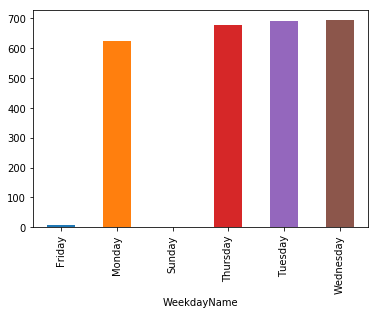

In [109]:
# If we don't specify an ordering for the x-axis, we get
# a random order of weekdays:
weekday_name_counts.plot.bar();

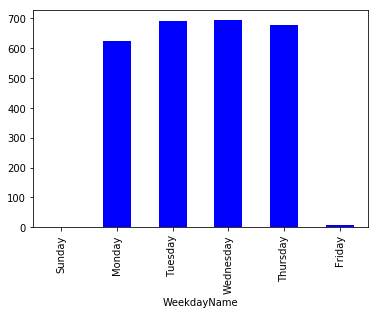

In [110]:
# Plot the number of shows by day of the week,
# but use helpful x-axis names:

# First, create a list with the order of days.
# NOTE:  There were no shows on Saturday.
weekdayList = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', \
               'Thursday', 'Friday']

# Now, plot in order of weekdayList:
weekday_name_counts[weekdayList].plot.bar(color='blue');

In [111]:
# Find all unique occupations and groups:
set(df['GoogleKnowlege_Occupation']).union(set(df['Group']))

# This is simply the union of these two columns

{'-',
 '0',
 'ADMIRAL',
 'AUTHOR',
 'Academic',
 'Acting',
 'Adviser',
 'Advocacy',
 'American Political figure',
 'American football quarterback',
 'American football running back',
 'American football wide receiver',
 'Associate Justice of the Supreme Court of the United States',
 'Astronaut',
 'Astrophysicist',
 'Athletics',
 'Attorney',
 'Attorney at law',
 'Author',
 'Band',
 'Baseball athlete',
 'Baseball player',
 'Basketball Coach',
 'Basketball player',
 'Beach Volleyball Player',
 'Broadcaster',
 'Business',
 'Business magnate',
 'Businessman',
 'Businesswoman',
 'CHARACTER',
 'Cartoonist',
 'Chef',
 'Choreographer',
 'Clergy',
 'Coach',
 'Columnist',
 'Comedian',
 'Comedy',
 'Comic',
 'Commentator',
 'Composer',
 'Consultant',
 'Correspondent',
 'Critic',
 'Diplomat',
 'Director',
 'Director of the Consumer Financial Protection Bureau',
 'Documentary Filmmaker',
 'EPA administrator',
 'Economist',
 'Editor',
 'Educator',
 'Entrepreneur',
 'Ethologist',
 'Executive',
 'Fictio

In [112]:
# Find the number of unique occupations and groups:
setOfUniques = set(df['GoogleKnowlege_Occupation']).union(set(df['Group']))
len(setOfUniques)

412


---

## Example 3 -- Scraping HTML Tables

*This material comes from Wes McKinney's textbook*

In [2]:
tables = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [3]:
# How many tables did we find on this webpage?
len(tables)

1

In [4]:
# Our "failure" data will be in the first (and only) table:
failures = tables[0]

In [5]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"


In [6]:
len(failures)

560

In [7]:
# How many bank failures were there per year?
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps

0     2020-02-14
1     2019-11-01
2     2019-10-25
3     2019-10-25
4     2019-05-31
5     2017-12-15
6     2017-10-13
7     2017-05-26
8     2017-05-05
9     2017-04-28
10    2017-03-03
11    2017-01-27
12    2017-01-13
13    2016-09-23
14    2016-08-19
15    2016-05-06
16    2016-04-29
17    2016-03-11
18    2015-10-02
19    2015-10-02
20    2015-07-10
21    2015-05-08
22    2015-02-27
23    2015-02-13
24    2015-01-23
25    2015-01-16
26    2014-12-19
27    2014-11-07
28    2014-10-24
29    2014-10-17
         ...    
530   2008-05-09
531   2008-03-07
532   2008-01-25
533   2007-10-04
534   2007-09-28
535   2007-02-02
536   2004-06-25
537   2004-03-19
538   2004-03-12
539   2004-02-14
540   2003-11-14
541   2003-05-09
542   2003-02-07
543   2002-12-17
544   2002-11-08
545   2002-09-30
546   2002-06-27
547   2002-06-26
548   2002-03-28
549   2002-03-01
550   2002-02-07
551   2002-02-01
552   2002-01-18
553   2002-01-11
554   2001-09-07
555   2001-07-27
556   2001-05-03
557   2001-02-

In [8]:
close_timestamps.dt

In [14]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2001      4
2019      4
2004      4
2007      3
2003      3
2000      2
2020      1
Name: Closing Date, dtype: int64

In [120]:
# Which bank failures were in NY?
failures[failures['ST'] == 'NY']

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
279,USA Bank,Port Chester,NY,58072,New Century Bank,"July 9, 2010"
340,The Park Avenue Bank,New York,NY,27096,Valley National Bank,"March 12, 2010"
341,LibertyPointe Bank,New York,NY,58071,Valley National Bank,"March 11, 2010"
450,Waterford Village Bank,Williamsville,NY,58065,"Evans Bank, N.A.","July 24, 2009"
537,Reliance Bank,White Plains,NY,26778,Union State Bank,"March 19, 2004"


In [121]:
# How many bank failures were in NY?
failures[failures['ST'] == 'NY']['ST'].count()

5

In [123]:
failures[failures['ST'] == 'NY']

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
279,USA Bank,Port Chester,NY,58072,New Century Bank,"July 9, 2010"
340,The Park Avenue Bank,New York,NY,27096,Valley National Bank,"March 12, 2010"
341,LibertyPointe Bank,New York,NY,58071,Valley National Bank,"March 11, 2010"
450,Waterford Village Bank,Williamsville,NY,58065,"Evans Bank, N.A.","July 24, 2009"
537,Reliance Bank,White Plains,NY,26778,Union State Bank,"March 19, 2004"



---

## Further Studying

Check out https://realpython.com/python-data-cleaning-numpy-pandas/ for some more examples.